First I will import the libraries required for processing our data and then I will load the dataset with a variable called df.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Now I will do some basic operations to know about our data in full depth.

In [115]:
df.shape

(1599, 12)

It contains 1599 rows and 12 columns

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dtype in the dataset are all continous variables.No categorical variable is available in the dataset so it is not required to do Label Encoding.

In [117]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Here the target variable is quality.

Now we explore the target variable i.e quality

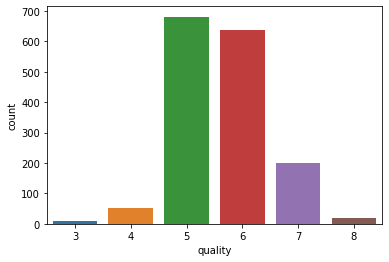

In [118]:
sns.countplot(df['quality']);

In [119]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Since our target variable is quality , we have our condition i.e the value 
7 or higher getting classified will be termed as 'good/1' and the remainder as 'not good/0'.

In [120]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
df['quality'] = df['quality'].replace(7,1)
df['quality'] = df['quality'].replace(8,1)

In [122]:
df['quality'].value_counts()

5    681
6    638
1    217
4     53
3     10
Name: quality, dtype: int64

In [123]:
df = df.replace(5,0)
df = df.replace(6,0)
df = df.replace(4,0)
df = df.replace(3,0)

In [124]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

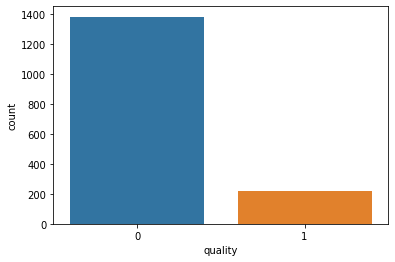

In [125]:
sns.countplot(df['quality']);

As you see above we have converted all the values for column i.e quality to 0 and 1 in which
0 represents the values which are less than 7 and 1 represents the values which are greater than or equal to 7. 

As per the dataset we have to do binary classification.

Since the dataset is a imbalanced dataset we have to make it into balanced dataset.Therefore,we will do it afterwards.

0    1382
1    1250
Name: quality, dtype: int64


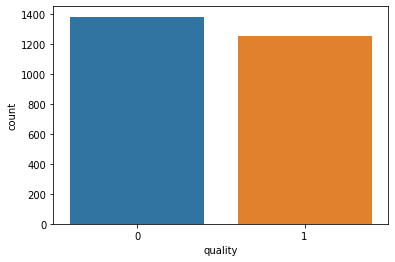

In [126]:
from sklearn.utils import resample
df_majority_class = df[df['quality'] == 0]

df_miniority_class = df[df['quality'] == 1]
df_minority_upsampled = resample(df_miniority_class,replace=True,n_samples=1250,random_state=42)
df = pd.concat([df_minority_upsampled,df_majority_class])

print(df['quality'].value_counts())
sns.countplot(df['quality'])

In [127]:
#Use describe function to check for any missing values

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000
mean,8.449088,0.483294,0.311041,2.488640,0.082333,14.128229,43.093465,0.996432,3.294821,0.687527,10.856649,0.474924
std,2.001379,0.175022,0.203432,1.450265,0.040065,11.669731,36.267538,0.002083,0.220574,0.161103,1.171921,0.499466
min,0.000000,0.120000,0.000000,0.000000,0.012000,0.000000,0.000000,0.990070,0.000000,0.330000,8.400000,0.000000
25%,7.200000,0.350000,0.120000,1.900000,0.066000,7.000000,19.000000,0.995160,3.200000,0.580000,9.800000,0.000000
50%,8.200000,0.460000,0.330000,2.200000,0.077000,12.000000,33.000000,0.996400,3.300000,0.660000,10.800000,0.000000
75%,9.800000,0.600000,0.470000,2.600000,0.088000,21.000000,53.000000,0.997600,3.390000,0.770000,11.700000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


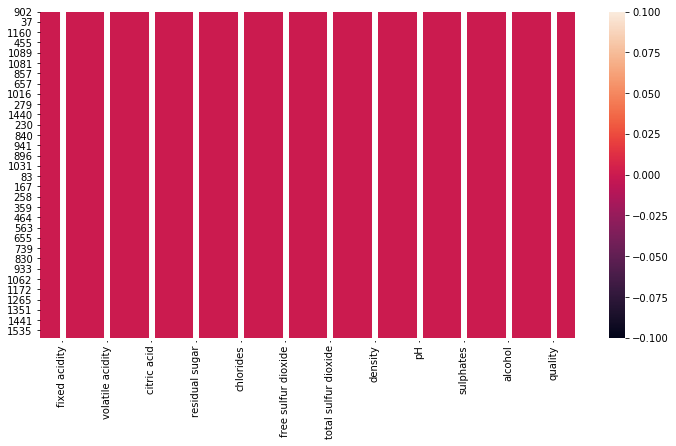

In [128]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [129]:
df.isnull().sum().sum()

0

There are no missing values in the dataset

Now plot the heatmap with describe function to visualize the data in a graphical format

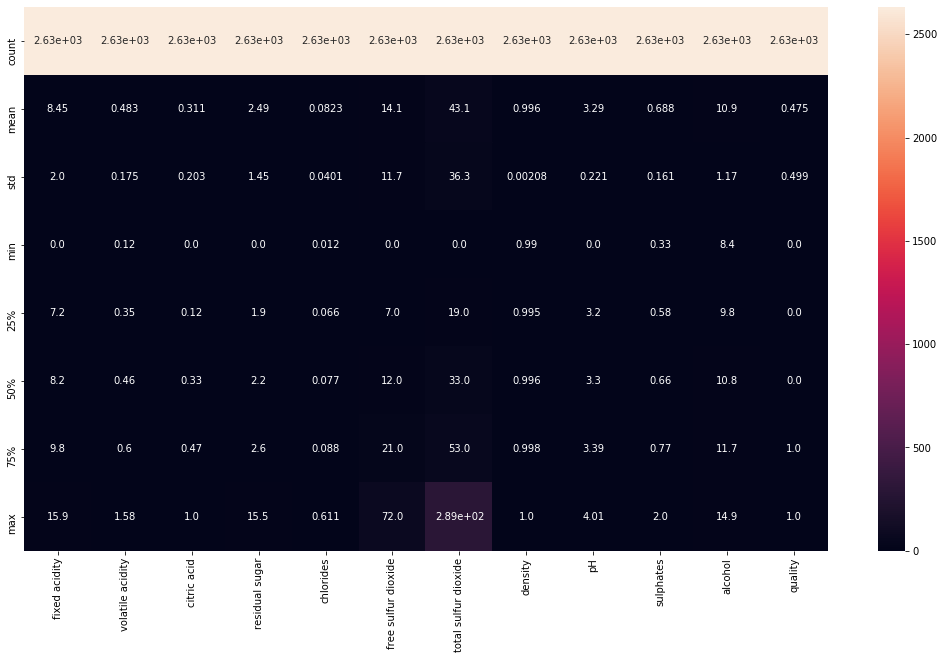

In [130]:
plt.figure(figsize=(18,10))
sns.heatmap(df.describe(),annot=True,fmt='0.3')

Data Distribution in graphical format

In [131]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
902,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,1
1162,8.5,0.320,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,1
855,7.6,0.735,0.02,2.5,0.071,10.0,14.0,0.99538,3.51,0.71,11.7,1
259,10.0,0.310,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,1
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,1


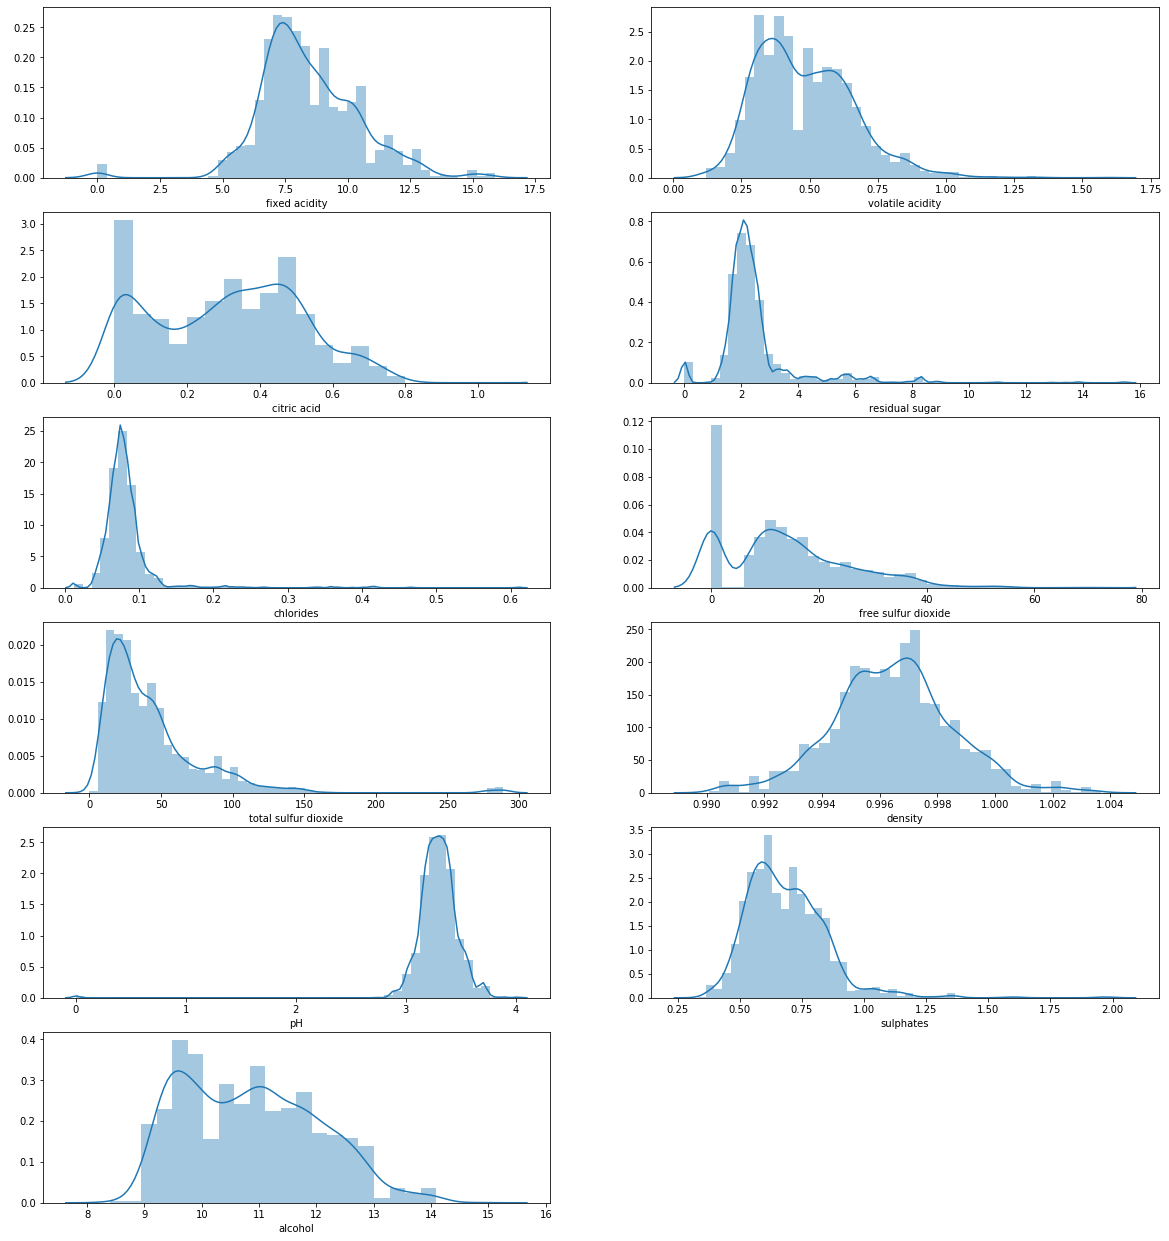

In [132]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 12:
        ax = plt.subplot(6,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()

From the distribution above,we see the data is not in normal distribution i.e they are skewness in the dataset.

In [133]:
df.skew()

fixed acidity           0.089648
volatile acidity        0.767621
citric acid             0.045363
residual sugar          3.326675
chlorides               6.143153
free sulfur dioxide     0.823642
total sulfur dioxide    2.961466
density                 0.066382
pH                     -7.459905
sulphates               1.684256
alcohol                 0.375511
quality                 0.100488
dtype: float64

The feature density and fixed acidity has the skewness within the range of +/-0.5 i.e
density has a strong correlation whereas fixed acidity has a negative correlation.

We will remove the skewness in the latter stages

Now we will see if there are any outliers present in the dataset

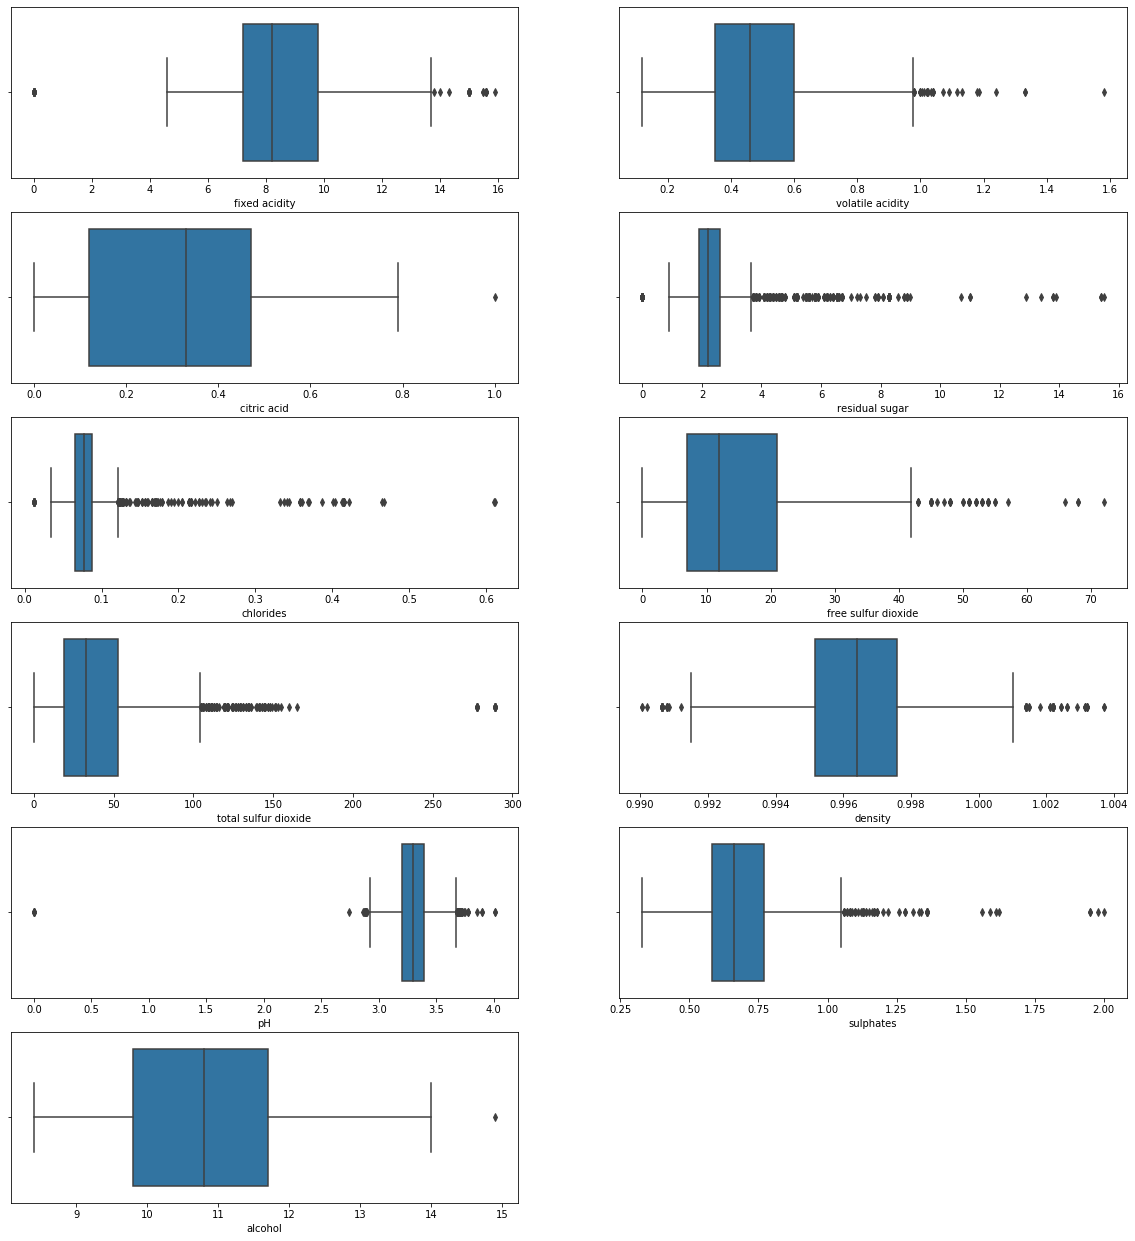

In [134]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 12:
        ax = plt.subplot(6,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

There are too many outliers present,we will resolve them one by one

FIXED ACIDITY

In [135]:
print(df['fixed acidity'].quantile(0.10))
print(df['fixed acidity'].quantile(0.90))

6.6
11.1


In [136]:
df['fixed acidity'] = np.where(df['fixed acidity'] < 6.6,6.6,df['fixed acidity'])
df['fixed acidity'] = np.where(df['fixed acidity'] > 11.1,11.1,df['fixed acidity'])

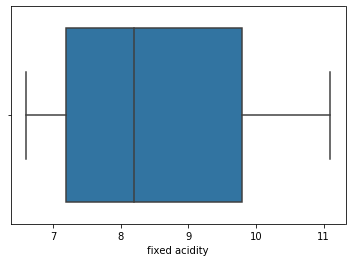

In [137]:
sns.boxplot(df['fixed acidity'])

VOLATILE ACIDITY

In [138]:
print(df['volatile acidity'].quantile(0.10))
print(df['volatile acidity'].quantile(0.90))

0.28
0.7


In [139]:
df['volatile acidity'] = np.where(df['volatile acidity'] < 0.28,0.28,df['volatile acidity'])
df['volatile acidity'] = np.where(df['volatile acidity'] > 0.7,0.7,df['volatile acidity'])

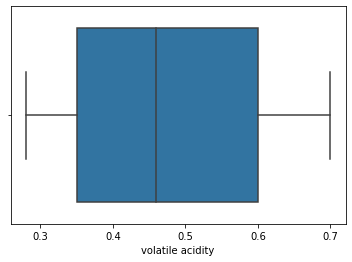

In [140]:
sns.boxplot(df['volatile acidity'])

CITRIC ACID

In [141]:
print(df['citric acid'].quantile(0.10))
print(df['citric acid'].quantile(0.90))

0.02
0.56


In [142]:
df['citric acid'] = np.where(df['citric acid'] > 0.56,0.56,df['citric acid'])

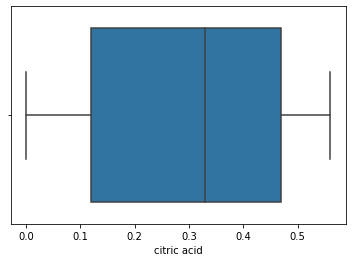

In [143]:
sns.boxplot(df['citric acid'])

RESIDUAL SUGAR

In [144]:
print(df['residual sugar'].quantile(0.10))
print(df['residual sugar'].quantile(0.90))

1.6
3.6450000000000045


In [145]:
df['residual sugar'] = np.where(df['residual sugar'] < 1.6,1.6,df['residual sugar'])
df['residual sugar'] = np.where(df['residual sugar'] > 3.6450000000000045,3.6450000000000045,df['residual sugar'])

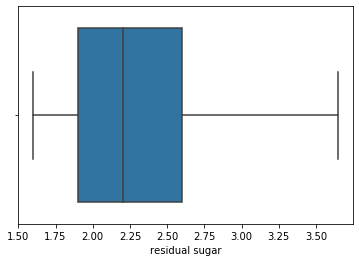

In [146]:
sns.boxplot(df['residual sugar'])

CHLORIDES

In [147]:
print(df['chlorides'].quantile(0.10))
print(df['chlorides'].quantile(0.90))

0.056
0.103


In [148]:
df['chlorides'] = np.where(df['chlorides'] < 0.056,0.056,df['chlorides'])
df['chlorides'] = np.where(df['chlorides'] > 0.103,0.103,df['chlorides'])

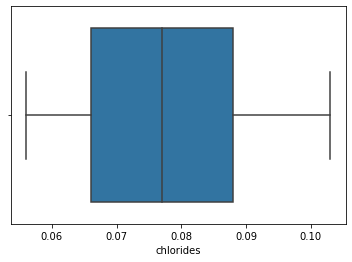

In [149]:
sns.boxplot(df['chlorides'])

FREE SULPHUR DIOXIDE

In [150]:
print(df['free sulfur dioxide'].quantile(0.10))
print(df['free sulfur dioxide'].quantile(0.90))

0.0
31.0


In [151]:
df['free sulfur dioxide'] = np.where(df['free sulfur dioxide'] > 31.0,31.0,df['free sulfur dioxide'])

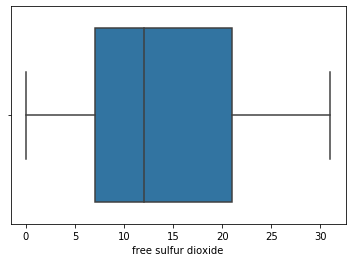

In [152]:
sns.boxplot(df['free sulfur dioxide'])

TOTAL SULPHUR DIOXIDE

In [153]:
print(df['total sulfur dioxide'].quantile(0.10))
print(df['total sulfur dioxide'].quantile(0.90))

13.0
88.0


In [154]:
df['total sulfur dioxide'] = np.where(df['total sulfur dioxide'] > 88.0,88.0,df['total sulfur dioxide'])

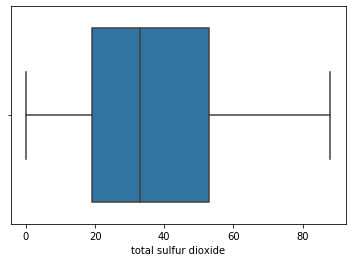

In [155]:
sns.boxplot(df['total sulfur dioxide'])

DENSITY

In [156]:
print(df['density'].quantile(0.10))
print(df['density'].quantile(0.90))

0.99378
0.9991


In [157]:
df['density'] = np.where(df['density'] < 0.99378,0.99378,df['density'])
df['density'] = np.where(df['density'] > 0.9991,0.9991,df['density'])

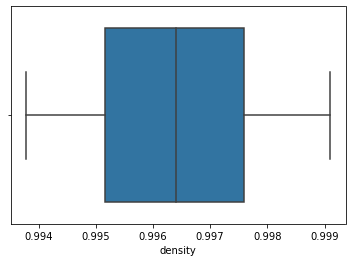

In [158]:
sns.boxplot(df['density'])

PH

In [159]:
print(df['pH'].quantile(0.10))
print(df['pH'].quantile(0.90))

3.12
3.51


In [160]:
df['pH'] = np.where(df['pH'] < 3.12,3.12,df['pH'])
df['pH'] = np.where(df['pH'] > 3.51,3.51,df['pH'])

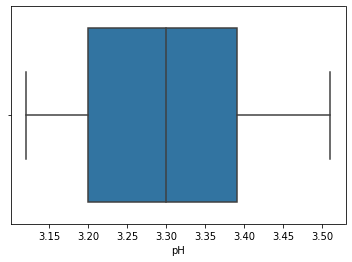

In [161]:
sns.boxplot(df['pH'])

SULPHATES

In [162]:
print(df['sulphates'].quantile(0.10))
print(df['sulphates'].quantile(0.90))

0.52
0.86


In [163]:
df['sulphates'] = np.where(df['sulphates'] > 0.86,0.86,df['sulphates'])

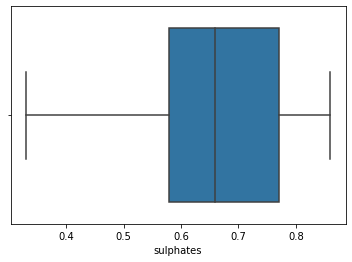

In [164]:
sns.boxplot(df['sulphates'])

ALCOHOL

In [165]:
print(df['alcohol'].quantile(0.10))
print(df['alcohol'].quantile(0.90))

9.4
12.5


In [166]:
df['alcohol'] = np.where(df['alcohol'] > 12.5,12.5,df['alcohol'])

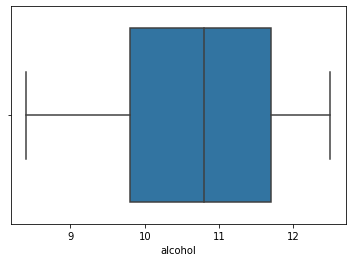

In [167]:
sns.boxplot(df['alcohol'])

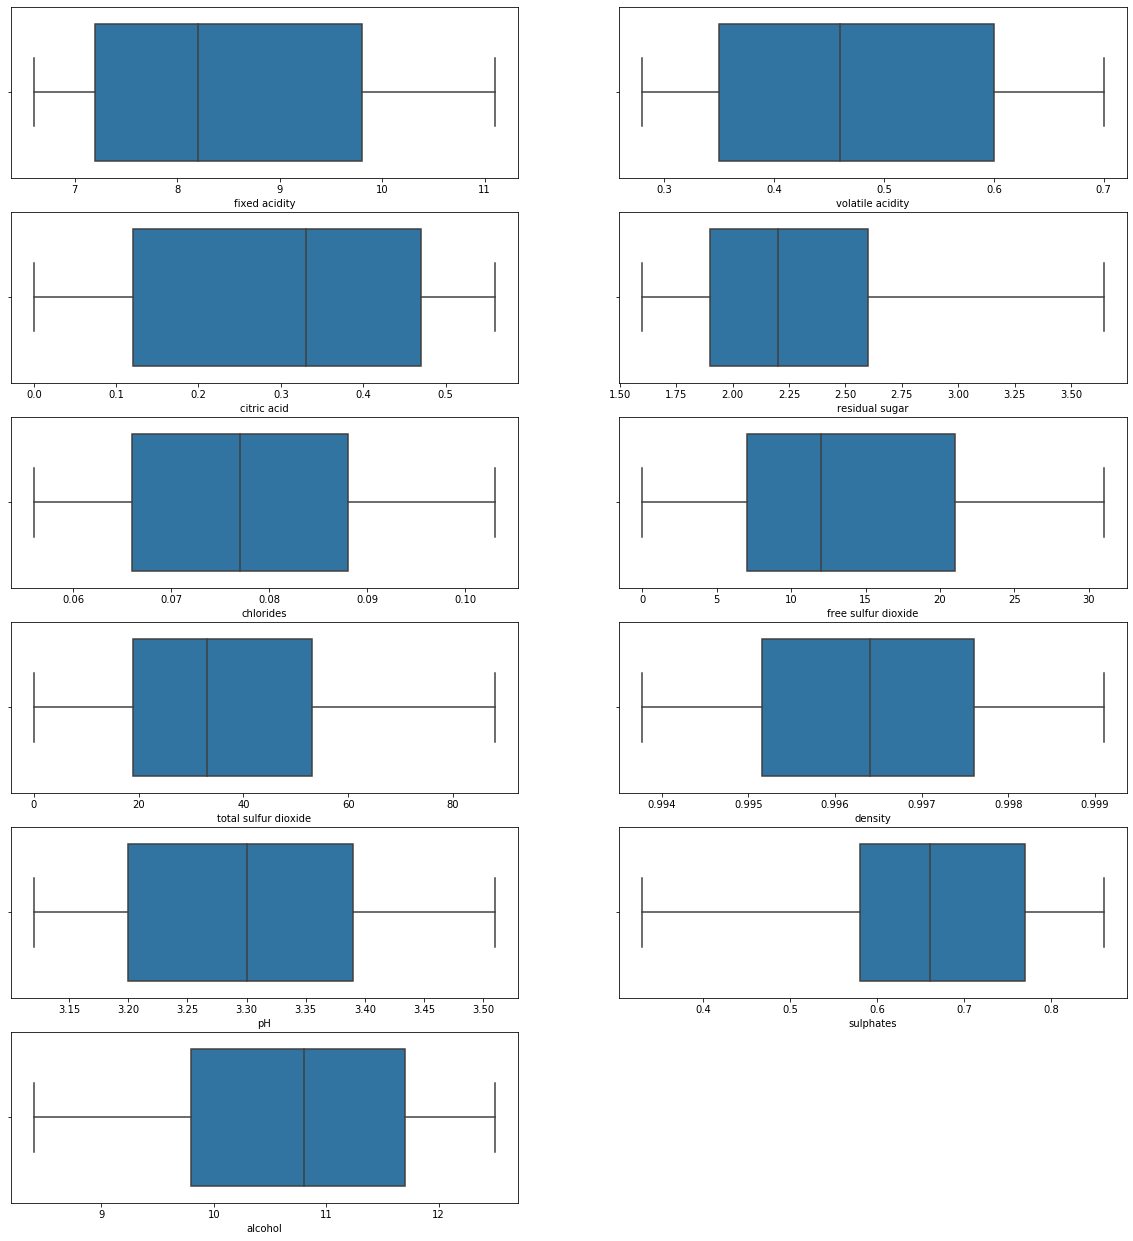

In [168]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 12:
        ax = plt.subplot(6,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

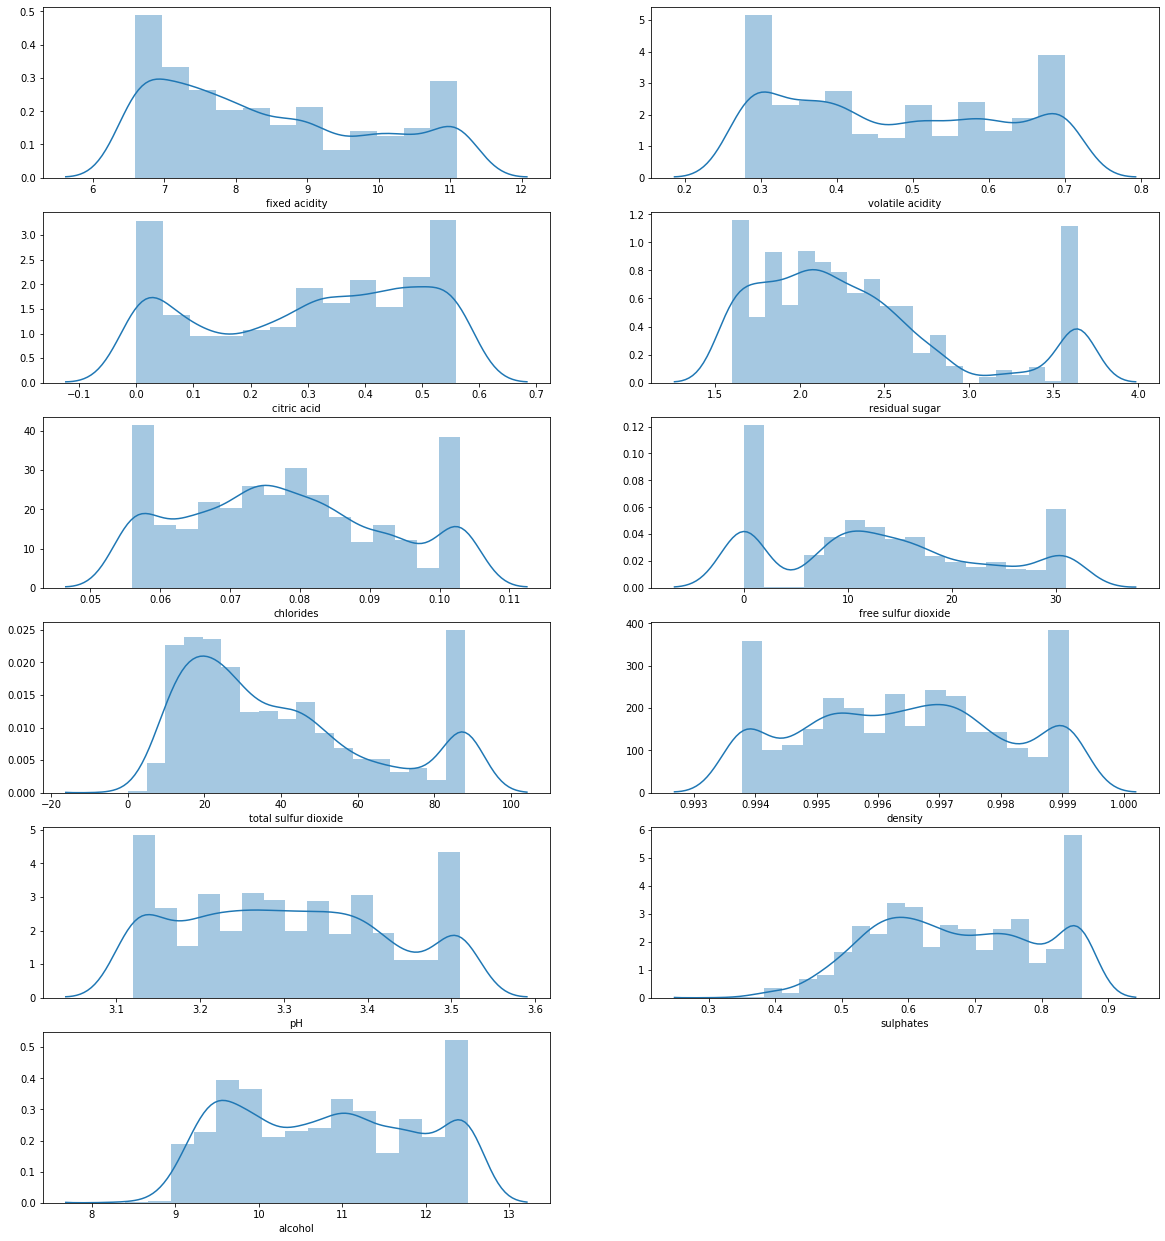

In [169]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 12:
        ax = plt.subplot(6,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()

In [170]:
df.skew()

fixed acidity           0.447013
volatile acidity        0.180588
citric acid            -0.240892
residual sugar          0.995578
chlorides               0.200476
free sulfur dioxide     0.240648
total sulfur dioxide    0.755320
density                 0.026954
pH                      0.167887
sulphates              -0.036443
alcohol                 0.083721
quality                 0.100488
dtype: float64

Now we used correlation matrix to find the relationship between the variables

In [171]:
df_corr = df.corr()

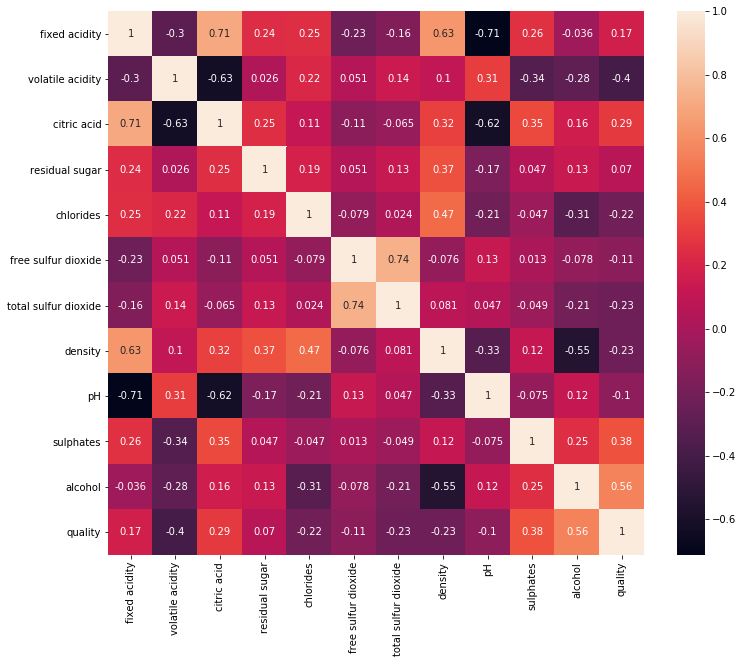

In [172]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True)

In [173]:
X = df.drop(['quality'],axis=1)
Y = df['quality']

In [174]:
X.shape

(2632, 11)

Now using Select KBest we will find best features for training our model.

In [177]:
from sklearn.feature_selection import SelectKBest,f_classif

In [178]:
best_features = SelectKBest(score_func=f_classif,k=6)

fit = best_features.fit(X_scaled,Y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)

In [179]:
feature_scores = pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns = ['Feature_Name','Score']

new_X = feature_scores.nlargest(6,'Score')

In [180]:
print(new_X)
print(new_X.shape)

          Feature_Name        Score
0        fixed acidity  1192.088721
1     volatile acidity   498.670697
2          citric acid   449.633933
3       residual sugar   243.845683
5  free sulfur dioxide   144.828718
4            chlorides   142.104355
(6, 2)


Using feature selection we will use only the best six features for building our model.

In [181]:
new_X = df[['alcohol','volatile acidity','sulphates','citric acid','total sulfur dioxide','chlorides']]
new_X.skew()

alcohol                 0.083721
volatile acidity        0.180588
sulphates              -0.036443
citric acid            -0.240892
total sulfur dioxide    0.755320
chlorides               0.200476
dtype: float64

Tuning the skewness using PowerTransformer

In [182]:
import warnings
warnings.filterwarnings("ignore")

In [183]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
new_X[['total sulfur dioxide']] = pt.fit_transform(new_X[['total sulfur dioxide']])
print(new_X)
print(new_X.skew())

      alcohol  volatile acidity  sulphates  citric acid  total sulfur dioxide  \
902      10.8             0.635       0.69         0.10             -0.024179   
1162     11.8             0.320       0.71         0.42             -0.819175   
855      11.7             0.700       0.71         0.02             -1.222708   
259      10.5             0.310       0.80         0.47             -0.024179   
925      11.0             0.280       0.86         0.36              1.364016   
...       ...               ...        ...          ...                   ...   
1594     10.5             0.600       0.58         0.08              0.423910   
1595     11.2             0.550       0.76         0.10              0.663037   
1596     11.0             0.510       0.75         0.13              0.272855   
1597     10.2             0.645       0.71         0.12              0.423910   
1598     11.0             0.310       0.66         0.47              0.349858   

      chlorides  
902      

Scaling the values using MinMax Scaler

In [184]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(new_X)

X_scaled

array([[0.58536585, 0.8452381 , 0.67924528, 0.17857143, 0.72129147,
        0.5106383 ],
       [0.82926829, 0.0952381 , 0.71698113, 0.75      , 0.58504731,
        0.40425532],
       [0.80487805, 1.        , 0.71698113, 0.03571429, 0.51589095,
        0.31914894],
       ...,
       [0.63414634, 0.54761905, 0.79245283, 0.23214286, 0.77219638,
        0.42553191],
       [0.43902439, 0.86904762, 0.71698113, 0.21428571, 0.79808372,
        0.40425532],
       [0.63414634, 0.07142857, 0.62264151, 0.83928571, 0.78539286,
        0.23404255]])

Now we completed with the preprocessing part now we will focus on building our machine learning model.

In [189]:
X_scaled.shape

(2632, 6)

In [190]:
Y.shape

(2632,)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

Selecting the best random state for Logistic regression

In [192]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    a=accuracy_score(y_test,y_pred)
    b=confusion_matrix(y_test,y_pred)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  82.67477203647417 found on random state 1


Now we have the best random state now do model building for logistic regression

In [193]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=1)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_acc = accuracy_score(y_test,y_pred)*100
print(lr_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

82.67477203647417
[[282  54]
 [ 60 262]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       336
           1       0.83      0.81      0.82       322

    accuracy                           0.83       658
   macro avg       0.83      0.83      0.83       658
weighted avg       0.83      0.83      0.83       658



Selecting the best random state for Decision Tree

In [194]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred_1=dt.predict(x_test)
    a=accuracy_score(y_test,y_pred_1)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  98.0243161094225 found on random state 181


Now we have the best random state now do model building for decision tree.

In [195]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=181)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_1=dt.predict(x_test)
dt_accu = accuracy_score(y_test,y_pred_1)*100
print(dt_accu)
print(confusion_matrix(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))

97.72036474164135
[[315  12]
 [  3 328]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       327
           1       0.96      0.99      0.98       331

    accuracy                           0.98       658
   macro avg       0.98      0.98      0.98       658
weighted avg       0.98      0.98      0.98       658



Selecting the best random state for Random Forest 

In [196]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred_2=rf.predict(x_test)
    a=accuracy_score(y_test,y_pred_2)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  98.0243161094225 found on random state 1


In [219]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=1)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu = accuracy_score(y_test,y_pred_2)*100
print(rf_accu)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

97.56838905775076
[[321  15]
 [  1 321]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       336
           1       0.96      1.00      0.98       322

    accuracy                           0.98       658
   macro avg       0.98      0.98      0.98       658
weighted avg       0.98      0.98      0.98       658



Selecting the best random state for Gradient Boosting

In [198]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    gbt=GradientBoostingClassifier()
    gbt.fit(x_train,y_train)
    y_pred_3=gbt.predict(x_test)
    a=accuracy_score(y_test,y_pred_3)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  93.46504559270517 found on random state 113


In [220]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=113)
gbt=GradientBoostingClassifier()
gbt.fit(x_train,y_train)
y_pred_3=gbt.predict(x_test)
gbt_accu = accuracy_score(y_test,y_pred_3)*100
print(gbt_accu)
print(confusion_matrix(y_test,y_pred_3))
print(classification_report(y_test,y_pred_3))

93.46504559270517
[[302  36]
 [  7 313]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       338
           1       0.90      0.98      0.94       320

    accuracy                           0.93       658
   macro avg       0.94      0.94      0.93       658
weighted avg       0.94      0.93      0.93       658



# ACCURACY SCORE 

In [221]:
print("Logistic Regression : ",lr_acc)
print("Decision Tree : ",dt_accu)
print("Random Forest : ",rf_accu)
print("Gradient Boost : ",gbt_accu)

Logistic Regression :  82.67477203647417
Decision Tree :  97.72036474164135
Random Forest :  97.56838905775076
Gradient Boost :  93.46504559270517


# Cross Validation for all models

In [222]:
from sklearn.model_selection import cross_val_score

In [223]:
rfscore = cross_val_score(rf,X_scaled,Y,cv=5)
print(rfscore)
print("Cross Validation for Random Forest : " ,rfscore.mean()*100)

[0.9886148  0.92409867 0.97718631 0.91444867 0.96387833]
Cross Validation for Random Forest :  95.36453560941119


In [224]:
lrscore = cross_val_score(lr,X_scaled,Y,cv=5)
print(lrscore)
print("Cross Validation for Logistic Regression  : " ,lrscore.mean()*100)

[0.85199241 0.74762808 0.82129278 0.69391635 0.75475285]
Cross Validation for Logistic Regression  :  77.39164941089889


In [225]:
dtscore = cross_val_score(dt,X_scaled,Y,cv=5)
print(dtscore)
print("Cross Validation for Decision Tree : " ,dtscore.mean()*100)

[0.96204934 0.90132827 0.96768061 0.91254753 0.94106464]
Cross Validation for Decision Tree :  93.69340769547117


In [226]:
gbtscore = cross_val_score(gbt,X_scaled,Y,cv=5)
print(gbtscore)
print("Cross Validation for Gradient Boost : " ,gbtscore.mean()*100)

[0.92979127 0.82163188 0.92395437 0.8269962  0.89163498]
Cross Validation for Gradient Boost :  87.88017402471844


In [227]:
print("Logistic Regression : ",lrscore.mean()*100)
print("Decision Tree : ",dtscore.mean()*100)
print("Random Forest : ",rfscore.mean()*100)
print("Gradient Boost : ",gbtscore.mean()*100)

Logistic Regression :  77.39164941089889
Decision Tree :  93.69340769547117
Random Forest :  95.36453560941119
Gradient Boost :  87.88017402471844


# ROC AUC Curve

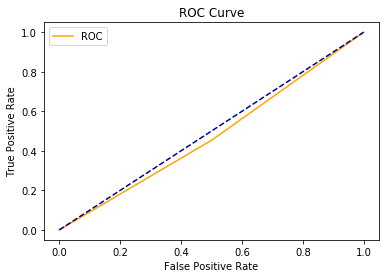

0.4766457100591716

In [228]:
fpr,tpr ,thresholds = roc_curve(y_test,y_pred)#Logistic Regression

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_pred)
auc_score


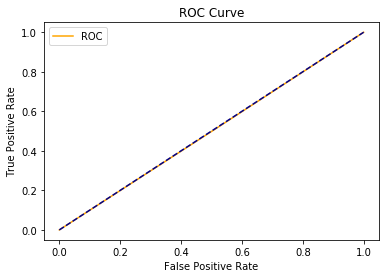

0.49893676035502965

In [229]:
fpr,tpr ,thresholds = roc_curve(y_test,y_pred_1)#Decision Tree

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_pred_1)
auc_score


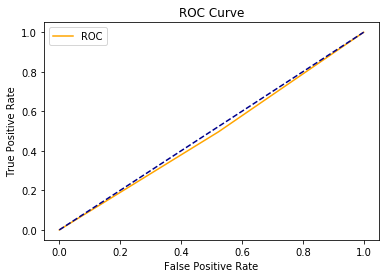

0.48660318047337275

In [230]:
fpr,tpr ,thresholds = roc_curve(y_test,y_pred_2)#Random Forest

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_pred_2)
auc_score


In [231]:
fpr,tpr ,thresholds = roc_curve(y_test,y_pred_3)

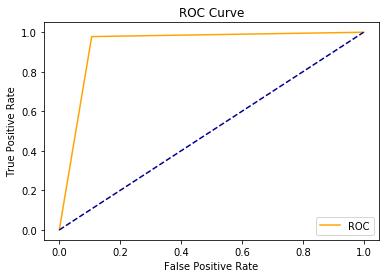

In [232]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [233]:
auc_score = roc_auc_score(y_test,y_pred_3)
auc_score

0.9358080621301774

The roc curve and auc_score is best for gradient boost and very poor for other three models.

# Hyperparameter Tuning for Gradient Boost

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
parameters = {
                'learning_rate':[0.15,0.1,0.05,0.01], 
                'n_estimators':[100,150,200,250]
            }

In [236]:
gbc=GridSearchCV(gbt,parameters)
gbc.fit(x_train,y_train)
print(gbc.best_params_)

{'learning_rate': 0.15, 'n_estimators': 200}


In [237]:
gbt=GradientBoostingClassifier(n_estimators=250,learning_rate=0.15)
gbt.fit(x_train,y_train)
gbt_predict=gbt.predict(x_test)
gbts=accuracy_score(y_test,gbt_predict)*100

In [238]:
gbts

95.59270516717325

In [239]:
print('Before HyperParameter Tuning: ', gbt_accu)
print('After HyperParameter Tuning: ' ,gbts)

Before HyperParameter Tuning:  93.46504559270517
After HyperParameter Tuning:  95.59270516717325


In [240]:
import pickle 
filename="Red_Wine_Quality_Prediction.pkl"
pickle.dump(gbts,open(filename,'wb')) 